In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 640x480 with 0 Axes>

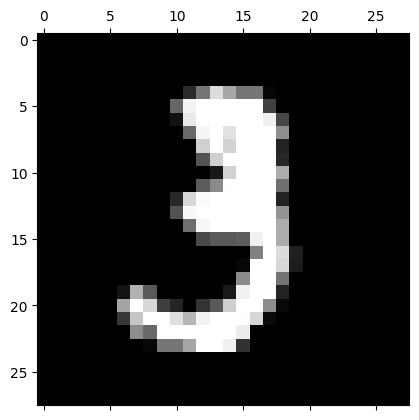

In [6]:
plt.gray()
plt.matshow(X_train[10])

In [7]:
y_train[10]

np.uint8(3)

In [8]:
X_train.shape #6000 + 2D array 28,28

(60000, 28, 28)

In [9]:
#the reasom we dividing this /255 is because to have a better scaling , cuz scaling helps in better accuracy
X_train = X_train/255
X_test = X_test/255

In [10]:
#as now this is the image havin 2D array (28*28 pixel)
#now we need to covert it into 1-D array so that, when giving features it is easy :-flattening

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

In [14]:
#this 784 is the input layer ie the neuron

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
#compilation


model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#actual trainig
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\Ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8110 - loss: 0.7266
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9142 - loss: 0.3090
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9191 - loss: 0.2907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9249 - loss: 0.2680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9253 - loss: 0.2647


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9127 - loss: 0.3084


[0.2737896740436554, 0.92330002784729]

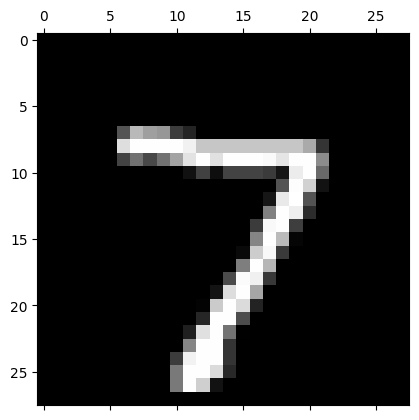

In [17]:
plt.matshow(X_test[0])

In [18]:
#this will predict values for everyone , so therefore hume ek variable lena pda!
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
#this will give you array having the accuracy , the highesh accuracy will be the final ans.
y_predicted[0]

array([1.8785471e-02, 2.7184296e-07, 5.1088292e-02, 9.5616555e-01,
       3.2514308e-03, 9.8491430e-02, 1.7241202e-06, 9.9981660e-01,
       1.2467971e-01, 6.1334562e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

np.int64(7)

In [21]:
#having an hidden layer of 100 let say 
#by hidden layer, the accuracy becomes more, but during iterating or training it will take more time as well
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#compilation
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#actual trainig
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8665 - loss: 0.4579
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9617 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9738 - loss: 0.0900
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9794 - loss: 0.0681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0541


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.1022


[0.08971051871776581, 0.9739999771118164]

In [25]:
#to not create a separate variable for flattening
#keras comes with a functio Flatten
#syntax:- keras.layers.Flatten(input_shape=(a,b))
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/test.log",histogram_freq=1)

#compilation
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#actual trainig
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

C:\Users\Ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8703 - loss: 0.4586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9622 - loss: 0.1297
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9744 - loss: 0.0853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9801 - loss: 0.0672
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9845 - loss: 0.0515
